In [1]:
%config InlineBackend.figure_format = 'retina'
import pygmt
import pandas as pd
import xarray as xr
import numpy as np
from clawpack.geoclaw import fgmax_tools
import os
import glob
import matplotlib.pyplot as plt

In [4]:
datadir = '../data/'
max_inundation = 'loc_0247_259_fgmax.nc'
min_inundation = 'dw_0283_1_fgmax.nc'
mean_inundation = 'w_0435_6_fgmax.nc'

minfg = xr.open_dataset(os.path.join(datadir,  min_inundation))
maxfg = xr.open_dataset(os.path.join(datadir,  max_inundation))
meanfg = xr.open_dataset(os.path.join(datadir,  mean_inundation))
no_breach = xr.open_dataset(os.path.join(datadir, 'no_breach_fgmax.nc'))
w_0019_6 = xr.open_dataset(os.path.join(datadir,  'w_0019_6_fgmax.nc'))
loc_0213_11 = xr.open_dataset(os.path.join(datadir,  'loc_0213_11_fgmax.nc'))
loc_0026_0011 = xr.open_dataset(os.path.join(datadir,  'loc_0026_0011_fgmax.nc'))
d_0284_6 = xr.open_dataset(os.path.join(datadir, 'd_0284_6_fgmax.nc'))

In [1]:
minfg

NameError: name 'minfg' is not defined

In [5]:
def plot_fg_subplots(fgdata, savepath):
    annot_locs = {'Forge River': [-72.83288, 40.80620986],
                  'Seatuck Cove': [-72.7260 - .030, 40.8094],
                 }
    import yaml
    with open("gmt_config.yml", "r") as ymlfile:
        cfg = yaml.safe_load(ymlfile)
    fig = pygmt.Figure()
    
    with pygmt.config(**cfg['region_map']):
        region = cfg['moriches_map']['region']
        frame_params = cfg['moriches_map']['basemap_frame']
        grid = '/home/catherinej/bathymetry/moriches.nc'
        grd = pygmt.grdclip(grid=grid, below=[0.0,-50])
        print(len(fgdata)/2)
        with fig.subplot(nrows=int(len(fgdata)/2), ncols=2, subsize=('15c', '7.5c'), frame='lrtb',
                         autolabel='+jTL+o1.65c/0.5c+gwhite', sharex='b', sharey='l', 
                         margins=['-.5c','-.5c', '.75c', '.75c']):
            for i, key in enumerate(fgdata):
                with fig.set_panel(panel=i):
                    fig.basemap(region=region, projection='M?', frame=frame_params)
                    pygmt.makecpt(cmap='gray', series=[-50,50], reverse=True)
                    fig.grdimage(grid=grd, cmap=True, shading=True)
                    pygmt.makecpt(cmap='lajolla', series=[0,3.0, 0.25],continuous=False, reverse=True)
                    fig.grdimage(grid=fgdata[key]['data'], cmap=True, nan_transparent=True)
                    fig.colorbar(position='jBC+o1.65c/.15c+w6/.5h+mc',
                                frame=['xa.5f.25+l"Sea Surface (m)"'],
                                )
    fig.show()
    fig.savefig(savepath)
                        

2.0


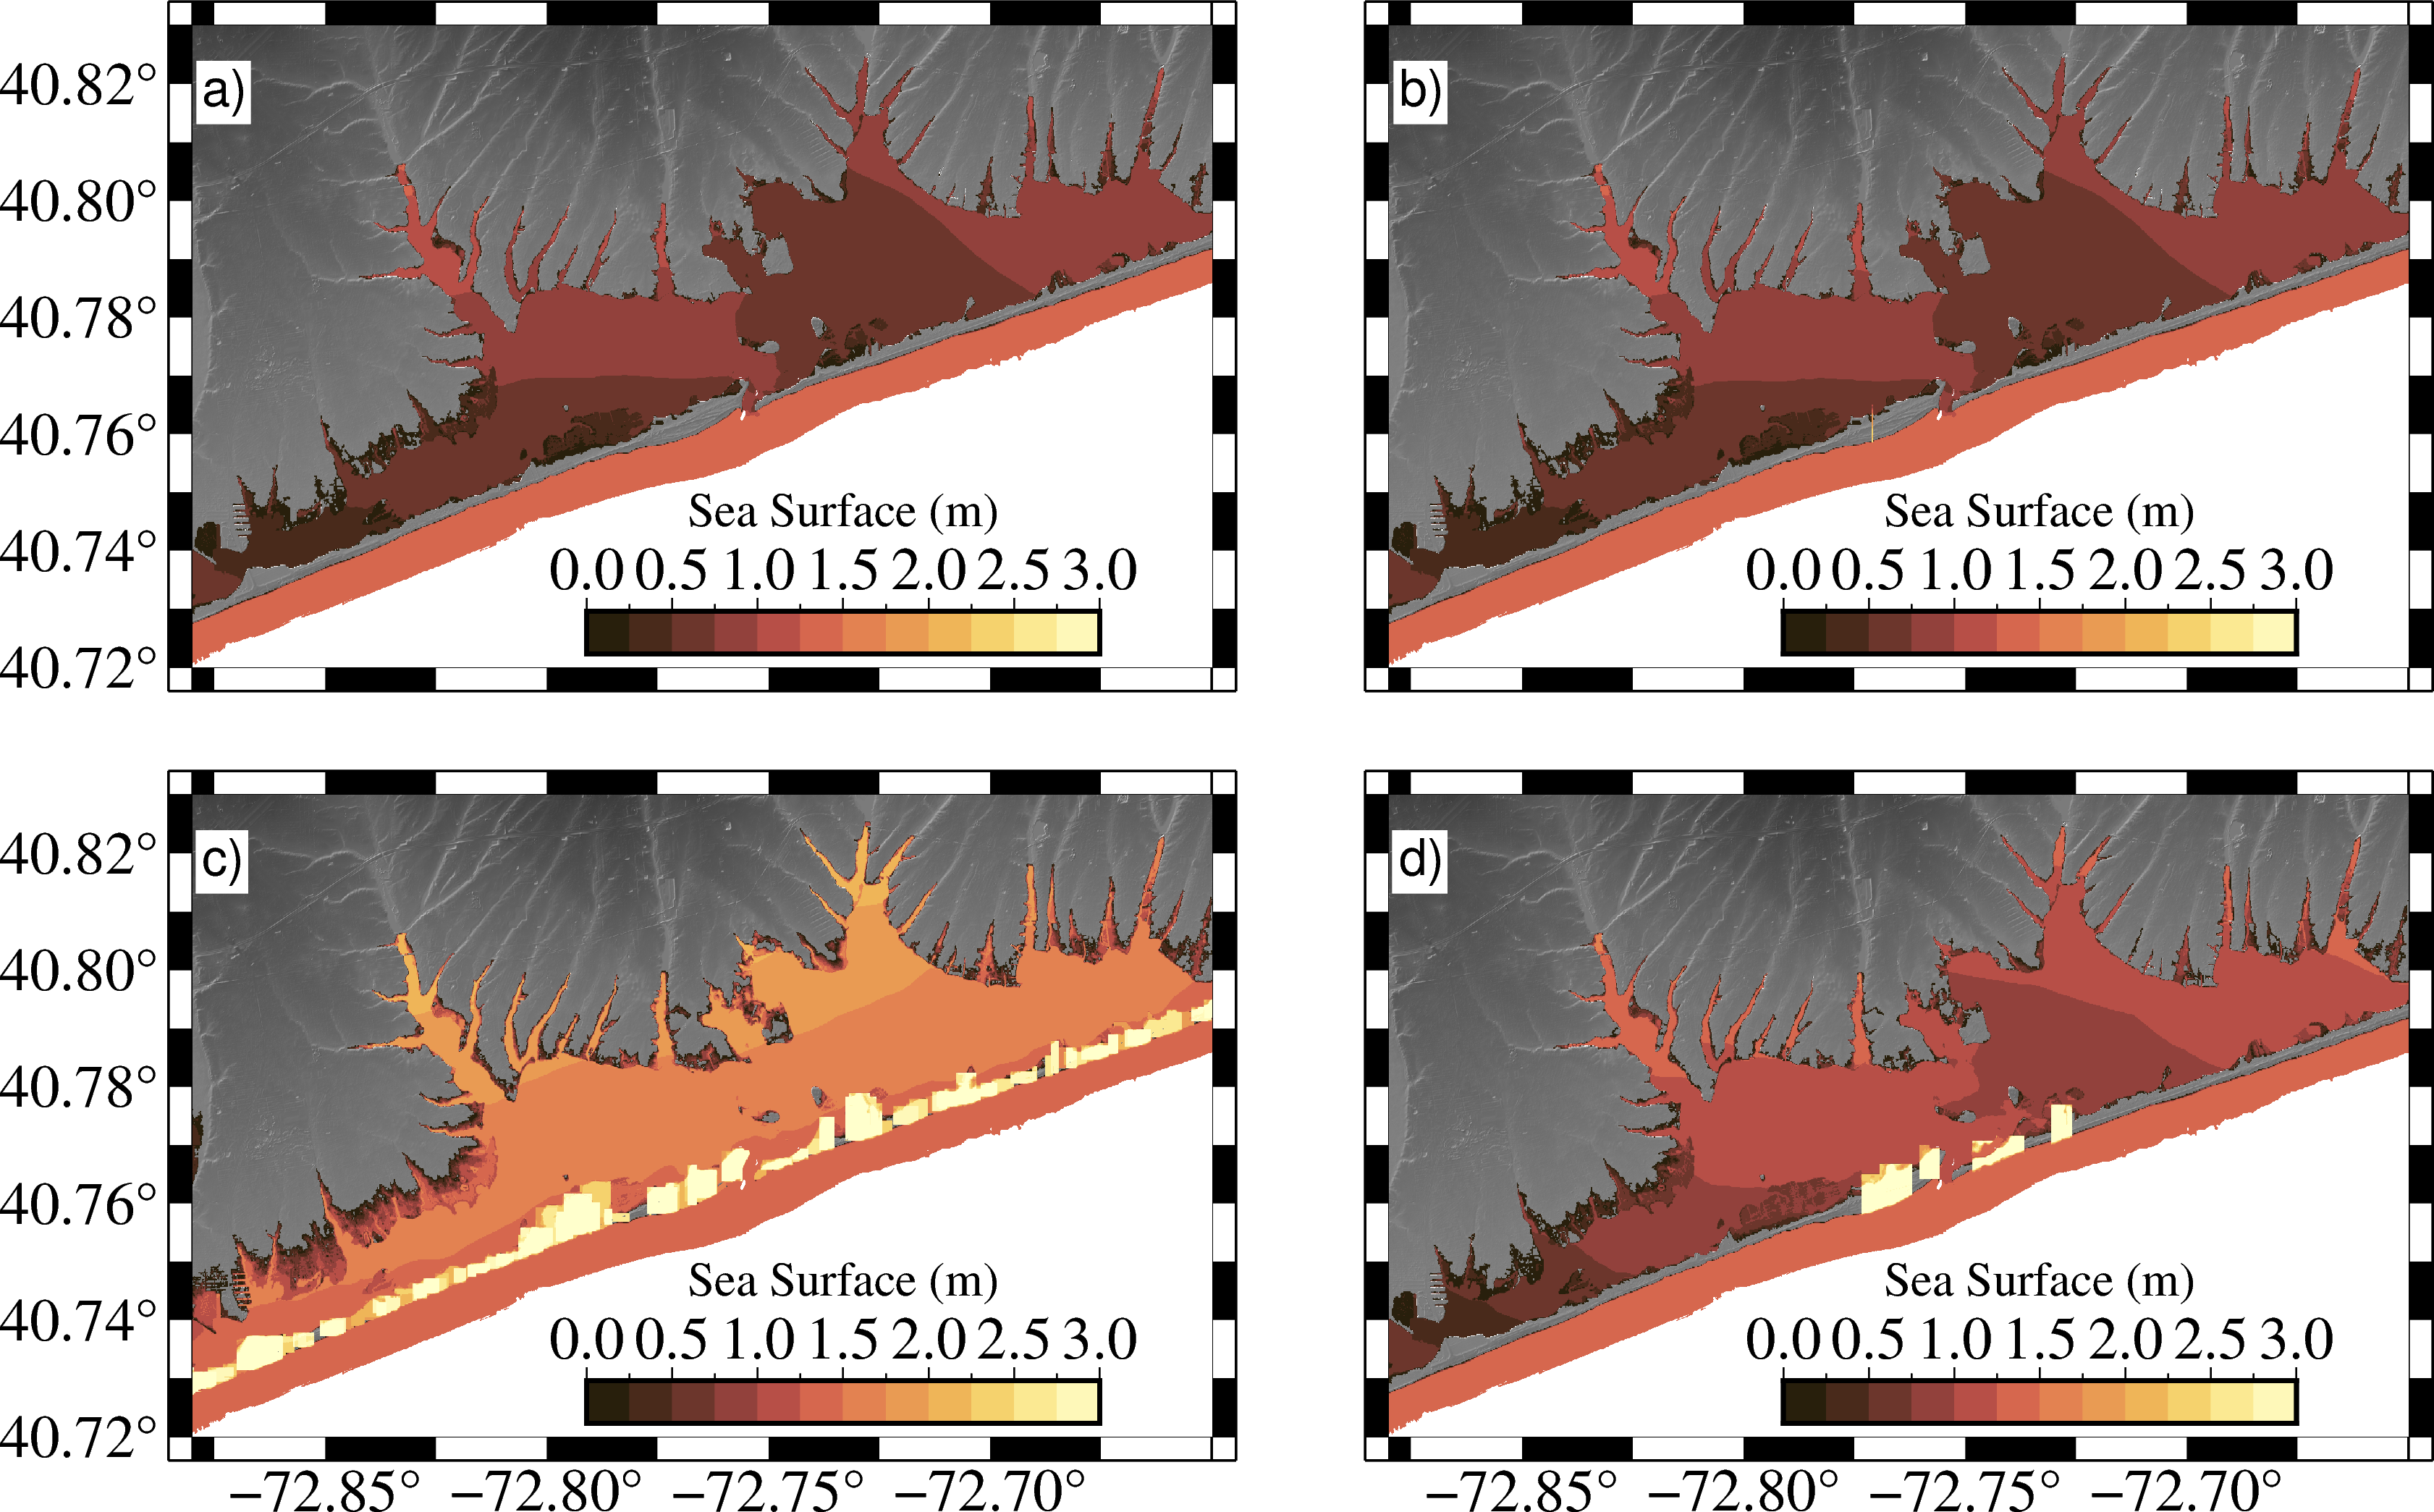

In [6]:
fgdata = {
    'no_breach': {'data': no_breach.eta.where(no_breach.eta > 0),
                  'name': 'No breach'},
    'minfg' : {'data': minfg.eta.where(minfg.eta > 0),
               'name': 'Minimum Inundation'},
    'maxfg' : {'data': maxfg.eta.where(maxfg.eta > 0),
               'name': 'Maximum Inundation'},
    'meanfg': {'data': meanfg.eta.where(meanfg.eta > 0),
               'name': 'Mean Inundation'}
}
savepath = 'fig6.pdf'
plot_fg_subplots(fgdata, savepath)

1.0


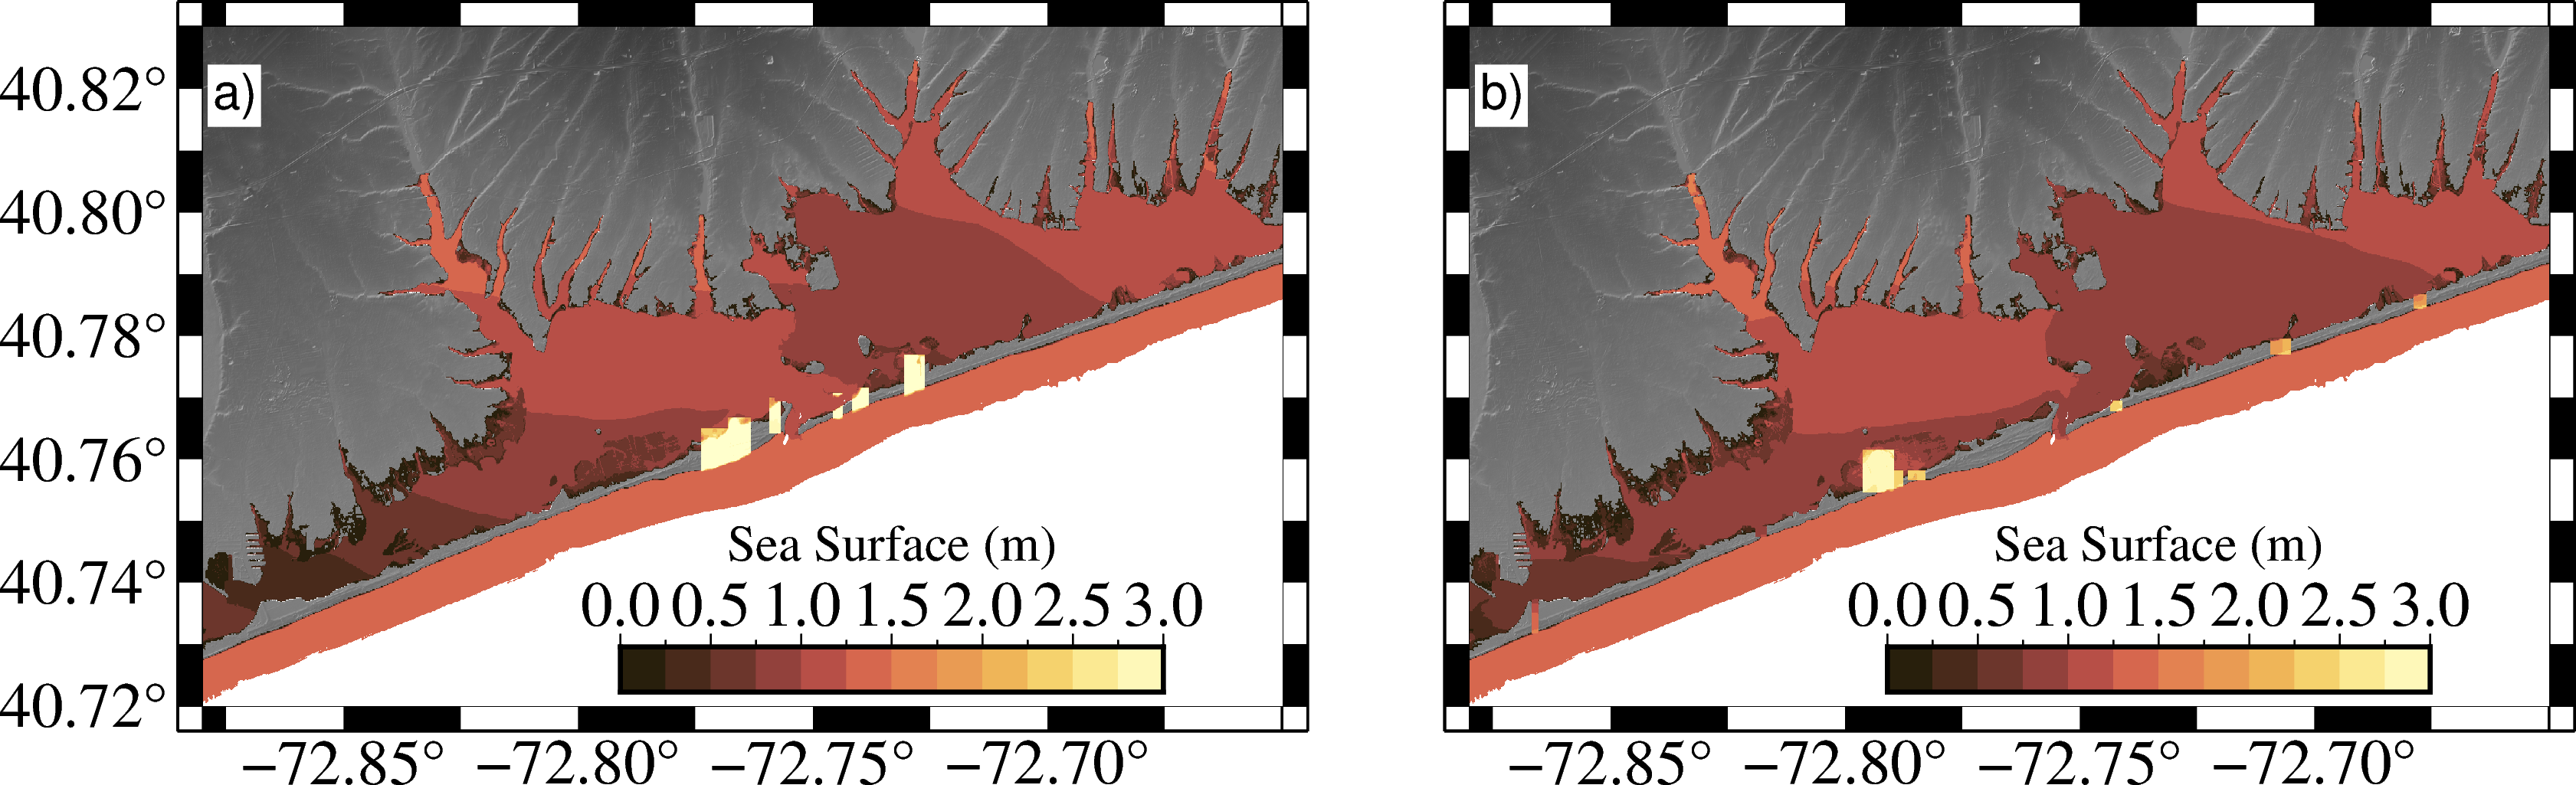

In [7]:
fg = {'w_0019_6': {'data': w_0019_6.eta.where(w_0019_6.eta > 0),
                   'name': 'w_0019_6'},
      'loc_0213_11':{'data': loc_0213_11.eta.where(loc_0213_11.eta > 0),
                     'name': 'loc_0213_11'}}
plot_fg_subplots(fg, 'fig7.pdf')
